# 1. Load cultural references

In [1]:
import pandas as pd
import os
import spacy
from tqdm import tqdm
import seaborn as sns
import numpy as np
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 3000000
import random
os.chdir(top_dir)


import matplotlib.pyplot as plt

In [2]:
authors=['bachman','harris', 'straub', 'koontz', 'king']
with open("bachman_all-cultural-references.txt", encoding='utf8') as f:
    entities = f.readlines()

In [3]:
", ".join(sorted(list(set([(entity.strip())  for entity in entities if len(entity.strip()) > 0]))))

"A&S Tires, A. Gordon Pym, AP wire, Abdul Allhazred, Adreizi Brothers, Agatha Christie, Ahab, Albert Einstein, Alfie, Alligators All Around, American Express, Amoco, Amos ’n Andy, Amway, Anacin, Anaïs, And Justice for All, Andy Devine, Annie Oakley, Apple, Arco, Arlene Dahl, Art Linkletter, Aureomycin, Avis, B&O, BMW, Bach, Bally, Band-Aid, Banjo Rag, Banker’s Life Insurance, Barbie, Bausch & Lomb, Be-Bop, Be-bop-a-lula, she's my baby, Beach Boys, Beatles, Beechcraft, Ben Alexander, Bermuda, Bertrand Russell, Beverly Hill-billies, Big Mac, Bill Cullen, Black Jack gum, Blackglama, Bob Hope, Bobby Sherman, Bombardier Skidoo, Bonneville, Brain from Planet Arous, Brian Wilson, Briggs & Stratton, Broderick Crawford, Bruce Springsteen, Bud, Budweiser, Buick, Burger King, Buttercup, Cadillac, Caesar's Palace, Calvin Klein, Camel, Campbell, Canada Mints, Captain Midnight, Captain Queeg, Chancellor-Brinkley, Chargers, Charles Manson, Charmin, Chatty Cathy, Cheez-Doodles, Chesterfield, Chevrolet

In [4]:
import re 

def clean_quotes(string):
    return re.sub("[\'’]", '', string )

In [5]:
bachman_entities = list(set([clean_quotes(entity.strip().lower())  for entity in entities if len(entity.strip()) > 0]))
bachman_entities

['avis',
 'rodan',
 'gulf',
 'piper cub',
 'toys are joys',
 'albert einstein',
 'humphrey bogart',
 'flair fineliners',
 'dr. scholl',
 'b&o',
 'coca-cola',
 'mercury',
 'trs-80',
 'range rider',
 'marcus welby',
 'blackglama',
 'john cougar mellancamp',
 'campbell',
 'walter cronkite',
 'lipton',
 'farmer brown',
 'three stooges',
 'twinky',
 'barbie',
 'jack barry',
 'tom paxton',
 'camel',
 'tarr brothers',
 'peanuts comic strips',
 'southern pacific',
 'motorola',
 'green door',
 'saran wrap',
 'a&s tires',
 'pepsi-cola',
 'chatty cathy',
 'dungeons and dragons',
 'fantasia',
 'john cheever',
 'john chancellor',
 'porsche',
 'dorothy sayers',
 'fat sammys',
 'peggy sue',
 'starsky and hutch',
 'ghidra',
 'bermuda',
 'elvis',
 'rea express',
 'be-bop',
 'mcdonald',
 'charmin',
 'annie oakley',
 'hertz',
 'kleenex',
 'lawrence belch',
 'ben alexander',
 'apple',
 'klh',
 'miller lite',
 'great western',
 'bob hope',
 'sterno',
 'i dream of jeannie',
 'quoddy',
 'jock mahoney',
 'gar

In [6]:
len(bachman_entities)

525

# 2. Convert books to SpaCy docs

In [7]:
os.chdir("full_novels")
authors,  titles = [], []
for file in tqdm(os.listdir()):
    if file.endswith(".txt"):
        authors.append(file.split('-')[0])
        titles.append(file.split('-')[2].split('.')[0])


100%|██████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<?, ?it/s]


In [8]:
titles_docs = {}


for title in tqdm(titles): 
    print(title)
    docs = []
    for file in os.listdir():
        if file.endswith(".txt") and title == file.split('-')[2].split('.')[0]:
            with open(file, encoding='utf8') as f:
                contents = f.read()
                titles_docs[title] = nlp(contents)


  0%|                                                                                           | 0/64 [00:00<?, ?it/s]

The_Long_Walk


  2%|█▎                                                                                 | 1/64 [00:15<16:09, 15.39s/it]

Roadwork


  3%|██▌                                                                                | 2/64 [00:29<15:09, 14.67s/it]

Rage


  5%|███▉                                                                               | 3/64 [00:38<12:08, 11.95s/it]

Blaze


  6%|█████▏                                                                             | 4/64 [00:50<11:59, 11.98s/it]

The_Running_Man


  8%|██████▍                                                                            | 5/64 [00:58<10:29, 10.68s/it]

Thinner


  9%|███████▊                                                                           | 6/64 [01:11<11:08, 11.53s/it]

The_Regulators


 11%|█████████                                                                          | 7/64 [01:29<12:48, 13.48s/it]

Black_Sunday


 12%|██████████▍                                                                        | 8/64 [01:41<12:05, 12.95s/it]

Red_Dragon


 14%|███████████▋                                                                       | 9/64 [01:56<12:36, 13.76s/it]

The_Silence_of_the_Lambs


 16%|████████████▊                                                                     | 10/64 [02:10<12:17, 13.66s/it]

Hannibal


 17%|██████████████                                                                    | 11/64 [02:28<13:13, 14.97s/it]

Hannibal_Rising


 19%|███████████████▍                                                                  | 12/64 [02:36<11:17, 13.03s/it]

Carrie


 20%|████████████████▋                                                                 | 13/64 [02:45<10:02, 11.81s/it]

Salems_Lot


 22%|█████████████████▉                                                                | 14/64 [03:12<13:42, 16.45s/it]

The_Shining


 23%|███████████████████▏                                                              | 15/64 [03:34<14:46, 18.10s/it]

The_Stand


 25%|████████████████████▌                                                             | 16/64 [05:00<30:50, 38.55s/it]

The_Dead_Zone


 27%|█████████████████████▊                                                            | 17/64 [05:27<27:17, 34.84s/it]

Insomnia


 28%|███████████████████████                                                           | 18/64 [06:00<26:30, 34.58s/it]

Rose_Madder


 30%|████████████████████████▎                                                         | 19/64 [06:26<23:49, 31.76s/it]

The_Green_Mile


 31%|█████████████████████████▋                                                        | 20/64 [06:44<20:17, 27.66s/it]

Desperation


 33%|██████████████████████████▉                                                       | 21/64 [07:15<20:32, 28.66s/it]

Wizard_and_Glass


 34%|████████████████████████████▏                                                     | 22/64 [08:01<23:43, 33.89s/it]

Bag_of_Bones


 36%|█████████████████████████████▍                                                    | 23/64 [08:40<24:10, 35.37s/it]

The_Girl_Who_Loved_Tom_Gordon


 38%|██████████████████████████████▊                                                   | 24/64 [08:50<18:39, 27.98s/it]

Dreamcatcher


 39%|████████████████████████████████                                                  | 25/64 [09:33<21:04, 32.43s/it]

From_a_Buick_8


 41%|█████████████████████████████████▎                                                | 26/64 [10:00<19:25, 30.66s/it]

Wolves_of_the_Calla


 42%|██████████████████████████████████▌                                               | 27/64 [10:53<23:05, 37.46s/it]

Song_of_Susannah


 44%|███████████████████████████████████▉                                              | 28/64 [11:14<19:34, 32.62s/it]

The_Dark_Tower


 45%|█████████████████████████████████████▏                                            | 29/64 [11:59<21:10, 36.30s/it]

Colorado_Kid


 47%|██████████████████████████████████████▍                                           | 30/64 [12:05<15:21, 27.11s/it]

Cell


 48%|███████████████████████████████████████▋                                          | 31/64 [12:27<14:09, 25.73s/it]

Liseys_Story


 50%|█████████████████████████████████████████                                         | 32/64 [12:51<13:26, 25.19s/it]

Star_Quest


 52%|██████████████████████████████████████████▎                                       | 33/64 [12:56<09:47, 18.96s/it]

Beastchild


 53%|███████████████████████████████████████████▌                                      | 34/64 [13:02<07:33, 15.11s/it]

Warlock


 55%|████████████████████████████████████████████▊                                     | 35/64 [13:09<06:06, 12.62s/it]

After_the_Last_Race


 56%|██████████████████████████████████████████████▏                                   | 36/64 [13:19<05:32, 11.86s/it]

Night_Chills


 58%|███████████████████████████████████████████████▍                                  | 37/64 [13:31<05:18, 11.80s/it]

The_Vision


 59%|████████████████████████████████████████████████▋                                 | 38/64 [13:39<04:40, 10.79s/it]

Whispers


 61%|█████████████████████████████████████████████████▉                                | 39/64 [14:00<05:49, 14.00s/it]

The_Eyes_of_Darkness


 62%|███████████████████████████████████████████████████▎                              | 40/64 [14:12<05:16, 13.20s/it]

Phantoms


 64%|████████████████████████████████████████████████████▌                             | 41/64 [14:29<05:31, 14.40s/it]

Strangers


 66%|█████████████████████████████████████████████████████▊                            | 42/64 [15:11<08:16, 22.55s/it]

Lightning


 67%|███████████████████████████████████████████████████████                           | 43/64 [15:29<07:27, 21.32s/it]

The_Bad_Place


 69%|████████████████████████████████████████████████████████▍                         | 44/64 [15:47<06:45, 20.26s/it]

Hideaway


 70%|█████████████████████████████████████████████████████████▋                        | 45/64 [16:03<06:00, 18.98s/it]

Winter_Moon


 72%|██████████████████████████████████████████████████████████▉                       | 46/64 [16:17<05:15, 17.55s/it]

Fear_Nothing


 73%|████████████████████████████████████████████████████████████▏                     | 47/64 [16:32<04:46, 16.87s/it]

From_the_Corner_of_His_Eye


 75%|█████████████████████████████████████████████████████████████▌                    | 48/64 [16:59<05:16, 19.79s/it]

By_the_Light_of_the_Moon


 77%|██████████████████████████████████████████████████████████████▊                   | 49/64 [17:15<04:39, 18.61s/it]

The_Taking


 78%|████████████████████████████████████████████████████████████████                  | 50/64 [17:25<03:46, 16.15s/it]

The_Husband


 80%|█████████████████████████████████████████████████████████████████▎                | 51/64 [17:36<03:08, 14.52s/it]

The_Good_Guy


 81%|██████████████████████████████████████████████████████████████████▋               | 52/64 [17:46<02:39, 13.30s/it]

Julia


 83%|███████████████████████████████████████████████████████████████████▉              | 53/64 [17:57<02:16, 12.36s/it]

If_You_Could_See_Me_Now


 84%|█████████████████████████████████████████████████████████████████████▏            | 54/64 [18:10<02:06, 12.61s/it]

Ghost_Story


 86%|██████████████████████████████████████████████████████████████████████▍           | 55/64 [18:32<02:19, 15.46s/it]

Shadowland


 88%|███████████████████████████████████████████████████████████████████████▊          | 56/64 [18:51<02:13, 16.69s/it]

Floating_Dragon


 89%|█████████████████████████████████████████████████████████████████████████         | 57/64 [19:20<02:22, 20.35s/it]

Koko


 91%|██████████████████████████████████████████████████████████████████████████▎       | 58/64 [19:46<02:10, 21.82s/it]

Mystery


 92%|███████████████████████████████████████████████████████████████████████████▌      | 59/64 [20:07<01:48, 21.68s/it]

The_Throat


 94%|████████████████████████████████████████████████████████████████████████████▉     | 60/64 [20:37<01:36, 24.20s/it]

Hellfire_Club


 95%|██████████████████████████████████████████████████████████████████████████████▏   | 61/64 [21:00<01:11, 23.97s/it]

Mr_X


 97%|███████████████████████████████████████████████████████████████████████████████▍  | 62/64 [21:23<00:47, 23.55s/it]

Lost_Boy_Lost_Girl


 98%|████████████████████████████████████████████████████████████████████████████████▋ | 63/64 [21:34<00:19, 19.72s/it]

In_The_Night_Room


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [21:46<00:00, 20.41s/it]


# 3. Count entities in randomly-sampled 10,000-token segments

In [9]:
n_iterations = 100
segment_length = 10000

iteration = [i for i in range(0, n_iterations)]
multi_index = pd.MultiIndex.from_product([titles, iteration], names=('book_title', 'iteration'))

books_entity_counts = pd.DataFrame(index = multi_index, columns=['entity_count'])
books_entity_counts.entity_count = books_entity_counts.entity_count.fillna(0)


for title in titles: 
    for iteration in tqdm(range(0, n_iterations)):
        entity_count = 0
        doc = titles_docs[title]
        random_start_ix = random.randint(0, len(doc)-segment_length-1)
        segment_doc = doc[random_start_ix : random_start_ix+segment_length]
        for entity in bachman_entities: 
            for ent in segment_doc.ents:
                if entity == clean_quotes(ent.text.lower()):
                    entity_count += 1
        books_entity_counts.loc[title, iteration] = entity_count

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:13<00:00,  4.34s/it]


In [10]:
books_entity_counts

entity_count
book_title        iteration              
The_Long_Walk     0                     1
                  1                     1
                  2                     1
                  3                     2
                  4                     2
...                                   ...
In_The_Night_Room 95                    0
                  96                    1
                  97                    3
                  98                   11
                  99                    4

[6400 rows x 1 columns]

In [11]:
titles_authors = pd.DataFrame({"title": titles,
                              "author": authors })
entity_counts_books_authors = pd.merge(books_entity_counts.reset_index(), 
                                       titles_authors.reset_index(), 
                                       left_on='book_title', 
                                       right_on='title', 
                                       how='left' )[['author', 'book_title', 'iteration', 'entity_count']]


In [12]:
entity_counts_books_authors.to_csv("pop_culture_refs_counts_books_10000token_segments.csv")
entity_counts_books_authors

,author,book_title,iteration,entity_count
0,bachman,The_Long_Walk,0,1
1,bachman,The_Long_Walk,1,1
2,bachman,The_Long_Walk,2,1
3,bachman,The_Long_Walk,3,2
4,bachman,The_Long_Walk,4,2
...,...,...,...,...
6395,straub,In_The_Night_Room,95,0
6396,straub,In_The_Night_Room,96,1
6397,straub,In_The_Night_Room,97,3
6398,straub,In_The_Night_Room,98,11


# 4. Descriptive statistics of entity counts

In [13]:
df = pd.read_csv("pop_culture_refs_counts_books_10000token_segments.csv")
grouped = df.groupby(["author", "book_title"])['entity_count'].agg([np.mean, np.median, np.min, np.max, np.std])
grouped.to_csv("descriptive_stats_entity_counts.csv")

In [16]:
df.book_title=df.book_title.str.replace("_", " ");
df.author=df.author.str.capitalize()
df

,Unnamed: 0,author,book_title,iteration,entity_count
0,0,Bachman,The Long Walk,0,1
1,1,Bachman,The Long Walk,1,1
2,2,Bachman,The Long Walk,2,1
3,3,Bachman,The Long Walk,3,2
4,4,Bachman,The Long Walk,4,2
...,...,...,...,...,...
6395,6395,Straub,In The Night Room,95,0
6396,6396,Straub,In The Night Room,96,1
6397,6397,Straub,In The Night Room,97,3
6398,6398,Straub,In The Night Room,98,11


In [32]:
df.groupby(["author"])['entity_count'].agg([np.mean, np.median, np.min, np.max, np.std])

,mean,median,amin,amax,std
author,,,,,
Bachman,10.552857,6.0,0,53,11.320474
Harris,2.104000,1.0,0,13,2.291656
King,6.179500,3.0,0,89,9.200413
Koontz,7.908000,3.0,0,118,14.857823
Straub,4.401667,2.0,0,78,10.332520


[Text(0, 0.5, 'Book Title'), Text(0.5, 0, 'Pop Culture Reference Count')]

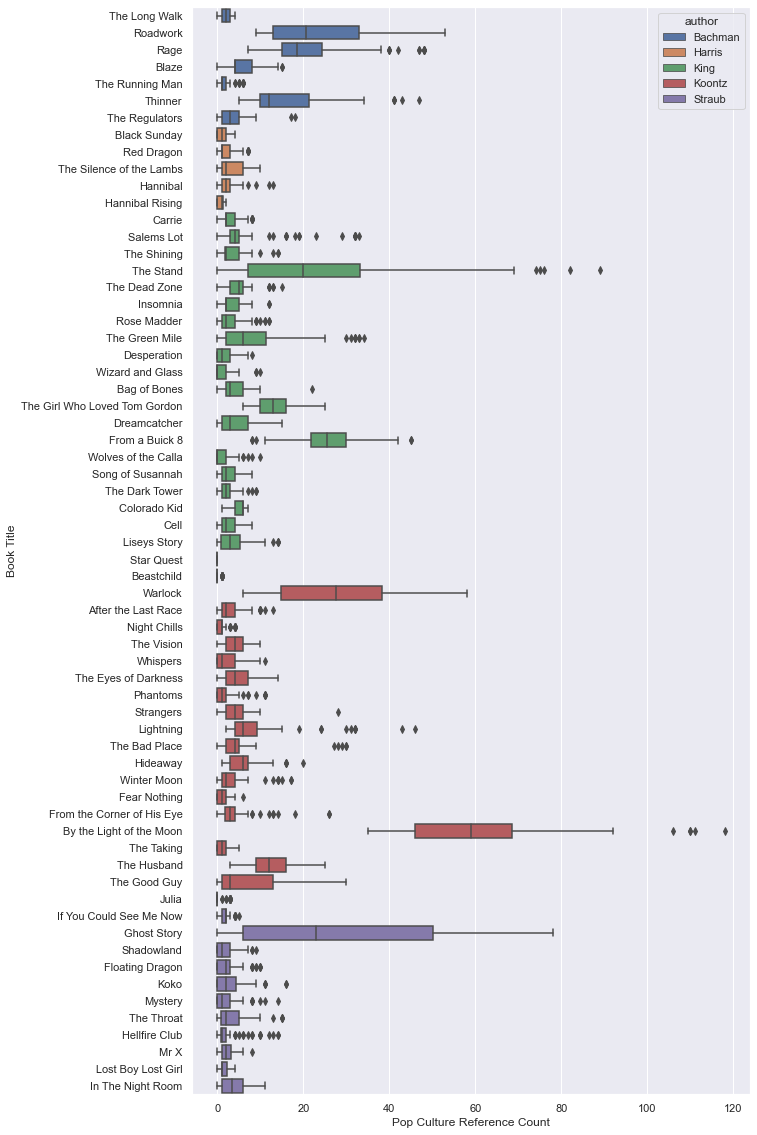

In [30]:
sns.set(rc={'figure.figsize':(10,20)})
sns.boxplot(x=df['entity_count'], y=df['book_title'], hue=df['author'], dodge=False).set(ylabel="Book Title", xlabel="Pop Culture Reference Count")